In [43]:
import numpy as np
import pandas as pd
import geopandas as gpd
from datetime import datetime, timedelta

# from matplotlib_scalebar.scalebar import ScaleBar


In [44]:
# jc_ruas = gpd.read_file('/home/georgynio/Documentos/shapes_diversos/bairros/ruas_max_20m-JC.shp')
jc_ruas = gpd.read_file('../../shapes_diversos/vias_munich/jc_polyline.shp')
jc_building = gpd.read_file('../../shapes_diversos/vias_munich/building_JC.shp')
df_inventario = pd.read_excel('../../shapes_diversos/vias_munich/inventario_vitoria.xlsx',
                               header=[0,1])

In [45]:
jc_ruas = jc_ruas.to_crs(4326)
jc_building = jc_building.to_crs(4326)


jc_ruas['HM'] = jc_ruas[['HG', 'HD']].max(axis=1)
jc_ruas['W_tot'] = jc_ruas[['WG', 'WD']].sum(axis=1)

jc_ruas['Aspect'] = jc_ruas.HM/jc_ruas.W_tot


print(jc_ruas.length.min(),jc_ruas.LENGTH.min())

4.894259087581278e-05 5.239904


/tmp/ipykernel_129852/896920391.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(jc_ruas.length.min(),jc_ruas.LENGTH.min())


In [46]:
# Dados pegos do relatorio do inventario de emissões (2015)
# https://iema.es.gov.br/Media/iema/CQAI/INVENT%C3%81RIO/Ecosoft_RTC190018_R1.pdf
# os valores da função de trafego estão ocultos na planilha excel

# função de trafego horario 
# avenida Armando Duarte Rabelo - 3Ponte_Total
ft_h_aadr = [0.256, 0.143, 0.092, 0.075, 0.103, 0.254, 0.953, 1.452, 1.460, 1.403, 1.327,
       1.387, 1.473, 1.448, 1.414, 1.432, 1.534, 1.655, 1.609, 1.363, 1.052, 0.890, 0.785,
       0.441]

# função de trafego mensal (janeiro a dezembro)
ft_m_aadr = [0.986, 0.876, 1.036, 0.961, 1.001, 0.980, 1.049, 1.038, 0.989, 1.041, 1.014, 1.031]

# função de trafego diario (segunda a domingo)
ft_d_aadr = [1.042, 1.077, 1.106, 1.096, 1.138, 0.873, 0.668]

##
# avenida Carlos Martins  - 3Ponte_Total
ft_h_acm = [0.256, 0.143, 0.092, 0.075, 0.103, 0.254, 0.953, 1.452, 1.460, 1.403, 1.327,
       1.387, 1.473, 1.448, 1.414, 1.432, 1.534, 1.655, 1.609, 1.363, 1.052, 0.890, 0.785,
       0.441]

# função de trafego mensal (janeiro a dezembro)
ft_m_acm = [0.986, 0.876, 1.036, 0.961, 1.001, 0.980, 1.049, 1.038, 0.989, 1.041, 1.014, 1.031]

# função de trafego diario (segunda a domingo)
ft_d_acm = [1.042, 1.077, 1.106, 1.096, 1.138, 0.873, 0.668]

##
# avenida Italina Pereira Mota  - 3Ponte_Total
ft_h_aipm = [0.256, 0.143, 0.092, 0.075, 0.103, 0.254, 0.953, 1.452, 1.460, 1.403, 1.327,
       1.387, 1.473, 1.448, 1.414, 1.432, 1.534, 1.655, 1.609, 1.363, 1.052, 0.890, 0.785,
       0.441]

# função de trafego mensal (janeiro a dezembro)
ft_m_aipm = [0.986, 0.876, 1.036, 0.961, 1.001, 0.980, 1.049, 1.038, 0.989, 1.041, 1.014, 1.031]

# função de trafego diario (segunda a domingo)
ft_d_aipm = [1.042, 1.077, 1.106, 1.096, 1.138, 0.873, 0.668]

##
# Rua Filogonio Mota  - 3Ponte_Total
ft_h_rfm = [0.256, 0.143, 0.092, 0.075, 0.103, 0.254, 0.953, 1.452, 1.460, 1.403, 1.327,
       1.387, 1.473, 1.448, 1.414, 1.432, 1.534, 1.655, 1.609, 1.363, 1.052, 0.890, 0.785,
       0.441]

# função de trafego mensal (janeiro a dezembro)
ft_m_rfm = [0.986, 0.876, 1.036, 0.961, 1.001, 0.980, 1.049, 1.038, 0.989, 1.041, 1.014, 1.031]

# função de trafego diario (segunda a domingo)
ft_d_rfm = [1.042, 1.077, 1.106, 1.096, 1.138, 0.873, 0.668]

##
# Rua Carlos Martins  - 3Ponte_Total
ft_h_rcm = [0.256, 0.143, 0.092, 0.075, 0.103, 0.254, 0.953, 1.452, 1.460, 1.403, 1.327,
       1.387, 1.473, 1.448, 1.414, 1.432, 1.534, 1.655, 1.609, 1.363, 1.052, 0.890, 0.785,
       0.441]

# função de trafego mensal (janeiro a dezembro)
ft_m_rcm = [0.986, 0.876, 1.036, 0.961, 1.001, 0.980, 1.049, 1.038, 0.989, 1.041, 1.014, 1.031]

# função de trafego diario (segunda a domingo)
ft_d_rcm = [1.042, 1.077, 1.106, 1.096, 1.138, 0.873, 0.668]

##
# Avenida Dante Michelini (2) - 625
ft_h_adm2 = [0.225, 0.134, 0.101, 0.090, 0.151, 0.371, 1.049, 1.267, 1.283, 1.261, 1.294,
           1.482, 1.508, 1.449, 1.428, 1.535, 1.687, 1.648, 1.572, 1.334, 1.091, 0.982,
           0.666, 0.390]

# função de trafego mensal (janeiro a dezembro)
ft_m_adm2 = [0.999, 0.938, 1.018, 0.928, 1.007, 1.022, 1.040, 0.881, 0.952, 1.051, 1.068, 1.096]

# função de trafego diario (segunda a domingo)
ft_d_adm2 = [1.006, 1.056, 1.087, 1.081, 1.120, 0.984, 0.667]

##
# Avenida Dante Michelini (1) - 625
ft_h_adm1 = [0.225, 0.134, 0.101, 0.090, 0.151, 0.371, 1.049, 1.267, 1.283, 1.261, 1.294,
           1.482, 1.508, 1.449, 1.428, 1.535, 1.687, 1.648, 1.572, 1.334, 1.091, 0.982,
           0.666, 0.390]

# função de trafego mensal (janeiro a dezembro)
ft_m_adm1 = [0.999, 0.938, 1.018, 0.928, 1.007, 1.022, 1.040, 0.881, 0.952, 1.051, 1.068, 1.096]

# função de trafego diario (segunda a domingo)
ft_d_adm1 = [1.006, 1.056, 1.087, 1.081, 1.120, 0.984, 0.667]

##
# Avenida José Celso Cláudio (1) - 3Ponte_Total
ft_h_ajcc1 = [0.256, 0.143, 0.092, 0.075, 0.103, 0.254, 0.953, 1.452, 1.460, 1.403, 1.327,
       1.387, 1.473, 1.448, 1.414, 1.432, 1.534, 1.655, 1.609, 1.363, 1.052, 0.890, 0.785,
       0.441]

# função de trafego mensal (janeiro a dezembro)
ft_m_ajcc1 = [0.986, 0.876, 1.036, 0.961, 1.001, 0.980, 1.049, 1.038, 0.989, 1.041, 1.014, 1.031]

# função de trafego diario (segunda a domingo)
ft_d_ajcc1 = [1.042, 1.077, 1.106, 1.096, 1.138, 0.873, 0.668]

##
# Avenida José Celso Cláudio (2) - 3Ponte_Total
ft_h_ajcc2 = [0.256, 0.143, 0.092, 0.075, 0.103, 0.254, 0.953, 1.452, 1.460, 1.403, 1.327,
       1.387, 1.473, 1.448, 1.414, 1.432, 1.534, 1.655, 1.609, 1.363, 1.052, 0.890, 0.785,
       0.441]

# função de trafego mensal (janeiro a dezembro)
ft_m_ajcc2 = [0.986, 0.876, 1.036, 0.961, 1.001, 0.980, 1.049, 1.038, 0.989, 1.041, 1.014, 1.031]

# função de trafego diario (segunda a domingo)
ft_d_ajcc2 = [1.042, 1.077, 1.106, 1.096, 1.138, 0.873, 0.668]

##
# Avenida José Rato - 3Ponte_Total
ft_h_ajr = [0.256, 0.143, 0.092, 0.075, 0.103, 0.254, 0.953, 1.452, 1.460, 1.403, 1.327,
       1.387, 1.473, 1.448, 1.414, 1.432, 1.534, 1.655, 1.609, 1.363, 1.052, 0.890, 0.785,
       0.441]

# função de trafego mensal (janeiro a dezembro)
ft_m_ajr = [0.986, 0.876, 1.036, 0.961, 1.001, 0.980, 1.049, 1.038, 0.989, 1.041, 1.014, 1.031]

# função de trafego diario (segunda a domingo)
ft_d_ajr = [1.042, 1.077, 1.106, 1.096, 1.138, 0.873, 0.668]

##
# Avenida Norte Sul (1) - 3Ponte_Total
ft_h_ans1 = [0.256, 0.143, 0.092, 0.075, 0.103, 0.254, 0.953, 1.452, 1.460, 1.403, 1.327,
       1.387, 1.473, 1.448, 1.414, 1.432, 1.534, 1.655, 1.609, 1.363, 1.052, 0.890, 0.785,
       0.441]

# função de trafego mensal (janeiro a dezembro)
ft_m_ans1 = [0.986, 0.876, 1.036, 0.961, 1.001, 0.980, 1.049, 1.038, 0.989, 1.041, 1.014, 1.031]

# função de trafego diario (segunda a domingo)
ft_d_ans1 = [1.042, 1.077, 1.106, 1.096, 1.138, 0.873, 0.668]

##
# Avenida Norte Sul (2) - 3Ponte_Total
ft_h_ans2 = [0.256, 0.143, 0.092, 0.075, 0.103, 0.254, 0.953, 1.452, 1.460, 1.403, 1.327,
       1.387, 1.473, 1.448, 1.414, 1.432, 1.534, 1.655, 1.609, 1.363, 1.052, 0.890, 0.785,
       0.441]

# função de trafego mensal (janeiro a dezembro)
ft_m_ans2 = [0.986, 0.876, 1.036, 0.961, 1.001, 0.980, 1.049, 1.038, 0.989, 1.041, 1.014, 1.031]

# função de trafego diario (segunda a domingo)
ft_d_ans2 = [1.042, 1.077, 1.106, 1.096, 1.138, 0.873, 0.668]

In [47]:
# junção das ruas e predios de acordo com a distancia
ruas_buildings = gpd.sjoin_nearest(jc_ruas, jc_building, how='left', distance_col='distancia')

# removendo colunas que não serão utilizadas
ruas_buildings = ruas_buildings.drop(
    columns=['MODUL_EMIS', 'addr_subur', 'amenity', 'addr_hou_1', 'source', 'index_right',
             'name', 'type', 'WG', 'WD', 'HG', 'HD', 'NDDEB', 'NDFIN', 'building', 'addr_stree'])
ruas_buildings.keys()

/home/yossimar/.local/lib/python3.11/site-packages/geopandas/array.py:365: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


Index(['TYPE', 'PM10', 'SO2', 'ID_left', 'LENGTH', 'Nome', 'geometry', 'HM',
       'W_tot', 'Aspect', 'building_l', 'height', 'ID_right', 'distancia'],
      dtype='object')

In [48]:
ruas_buildings['HEIGHT'] = ruas_buildings['height'].fillna(ruas_buildings['HM'])
ruas_buildings = ruas_buildings.rename(columns={'ID_left': 'ID'})
ruas_buildings['HEIGHT']

0        3
1        3
2       18
3      3.0
4      3.0
      ... 
662     30
663      3
664      3
665      3
666      3
Name: HEIGHT, Length: 668, dtype: object

<Axes: >

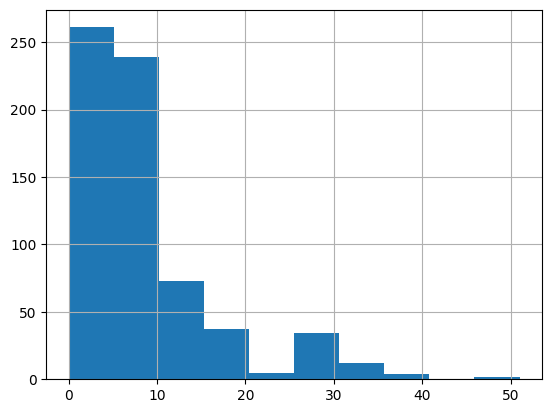

In [49]:
ruas_buildings = ruas_buildings.loc[~ruas_buildings['ID'].duplicated(),:]

ruas_buildings['HEIGHT'].astype('int').hist()

In [50]:
def fromLine(frame, col=None):
    # Obtiene las coordenadas de los extremos de cada línea
    xy = frame.geometry.xy
    longs1, longs2 = xy[0].tolist()  # Lista de coordenadas longitudinales de los extremos de la línea
    lats1, lats2 = xy[1].tolist()  # Lista de coordenadas latitudinales de los extremos de la línea
    
    # Si se especificó una columna específica, devuelve solo esa columna
    if col==1:
        return longs1
    elif col==2:
        return lats1
    elif col==3:
        return longs2
    elif col==4:
        return lats2
    
    # Si no se especificó una columna específica, devuelve todas las columnas
    else:
        return [longs1, lats1, longs2, lats2]

In [51]:
vias_principais = {'Av. Armando Duarte Rabelo':[ft_h_aadr, ft_d_aadr, ft_m_aadr, 612.376],
                   'Av. Carlos Martins':[ft_h_acm, ft_d_acm, ft_m_acm, 1640.097], 
                   'Av. Italina Pereira Mota':[ft_h_aipm, ft_d_aipm, ft_m_aipm, 634.548], 
                   'Rua Filogônio Mota':[ft_h_rfm, ft_d_rfm, ft_m_rfm, 279.536], 
                   'Rua Carlos Martins':[ft_h_rcm, ft_d_aadr, ft_m_rcm, 1213.443], 
                   'Av. Dante Michelini (2)':[ft_h_adm2, ft_d_adm2, ft_m_adm2, 318.575],
                   'Av. Dante Michelini (1)':[ft_h_adm1, ft_d_adm1, ft_m_adm1, 1023.543], 
                   'Av. José Celso Cláudio (1)':[ft_h_ajcc1, ft_d_ajcc1, ft_m_ajcc1, 522.143], 
                   'Av. José Celso Cláudio (2)':[ft_h_ajcc2, ft_d_ajcc2, ft_m_ajcc2, 610.373], 
                   'Av. José Rato':[ft_h_ajr, ft_d_ajr, ft_m_ajr, 911.469], 
                   'Av. Norte Sul (2)':[ft_h_ans2, ft_d_ans2, ft_m_ans2, 1007.374], 
                   'Av. Norte Sul (1)':[ft_h_ans1, ft_d_ans1, ft_m_ans2, 1790.298]}

# hora_ft = {'Av. Armando Duarte Rabelo':15, 'Av. Carlos Martins':16, 'Av. Italina Pereira Mota':10, 
#                    'Rua Filogônio Mota':16, 'Rua Carlos Martins':13, 'Av. Dante Michelini (2)':14, 'Av. Dante Michelini (1)':13,
#                    'Av. José Celso Cláudio (1)':13, 'Av. José Celso Cláudio (2)':10, 'Av. José Rato':14, 'Av. Norte Sul (2)':15, 'Av. Norte Sul (1)':11}
# dia_ft = {'Av. Armando Duarte Rabelo':9, 'Av. Carlos Martins':9, 'Av. Italina Pereira Mota':4, 
#                    'Rua Filogônio Mota':1, 'Rua Carlos Martins':9, 'Av. Dante Michelini (2)':1, 'Av. Dante Michelini (1)':1,
#                    'Av. José Celso Cláudio (1)':1, 'Av. José Celso Cláudio (2)':4, 'Av. José Rato':1, 'Av. Norte Sul (2)':1, 'Av. Norte Sul (1)':3}
# mes_ft = {'Av. Armando Duarte Rabelo':1, 'Av. Carlos Martins':1, 'Av. Italina Pereira Mota':4, 
#                    'Rua Filogônio Mota':9, 'Rua Carlos Martins':1, 'Av. Dante Michelini (2)':9, 'Av. Dante Michelini (1)':9,
#                    'Av. José Celso Cláudio (1)':9, 'Av. José Celso Cláudio (2)':10, 'Av. José Rato':9, 'Av. Norte Sul (2)':9, 'Av. Norte Sul (1)':10}


ruas_buildings['PM10'] = None
ruas_buildings['PM25'] = None
ruas_buildings['NOx'] = None
ruas_buildings['CO'] = None
ruas_buildings['SO2'] = None
ruas_buildings['code'] = None

length_secundarias = 0
for i, rows in jc_ruas.iterrows():
    # print(df_inventario[df_inventario[('Nome da Via', 'Unnamed: 1_level_1')]==rows.Nome])
    if rows.Nome in vias_principais:
        nome = rows.Nome
        # unidades do inventario (kg/h)
        taxa = df_inventario[df_inventario[('Nome da Via', 'Unnamed: 1_level_1')]==rows.Nome] # 
        fracao = rows.LENGTH / vias_principais[rows.Nome][3] # relação em metros
        #fracao = 1
        # correcao = taxa.LENGHT
        code='principal'
    else:
        nome = 'vias secundarias'
        taxa = df_inventario[df_inventario[('Nome da Via', 'Unnamed: 1_level_1')] == 'Vias Secundárias - Vitória'] 
        #correcao = 4_298 # extensão em km
        fracao = rows.LENGTH / (536_929) # fração da area que representa dentro da mancha urbana em m
        length_secundarias += rows.LENGTH
        code='secundaria'
    # jc_ruas.at[i,'PM10'] = float(taxa[('TOTAL_SEM_RESUSP','PM10_tot')])/correcao
    # jc_ruas.at[i,'PM25'] = float(taxa[('TOTAL_SEM_RESUSP','PM25_tot')])/correcao

    ruas_buildings.at[i,'Nome'] = nome
    ruas_buildings.at[i,'PM10'] = float(taxa[('TOTAL','PM10_tot')].iloc[0])*fracao # unidades (kg/h)
    ruas_buildings.at[i,'PM25'] = float(taxa[('TOTAL','PM25_tot')].iloc[0])*fracao
    ruas_buildings.at[i,'NOx'] = float(taxa[('Escapamento e Evaporativas (kg/h)','NOX ')].iloc[0])*fracao
    ruas_buildings.at[i,'CO'] = float(taxa[('Escapamento e Evaporativas (kg/h)','CO ')].iloc[0])*fracao
    ruas_buildings.at[i,'SO2'] = float(taxa[('Escapamento e Evaporativas (kg/h)','SO2 ')].iloc[0])*fracao
    ruas_buildings.at[i,'code'] = code



In [52]:
fracao

0.00010544709449480286

<Axes: >

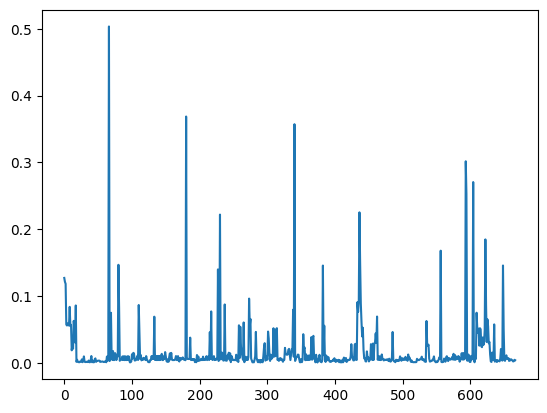

In [53]:
ruas_buildings.NOx.plot()

In [54]:
ruas_buildings[ruas_buildings['code']=='secundaria']['LENGTH'].sum()

39838.962232000005

<Axes: xlabel='LENGTH', ylabel='NOx'>

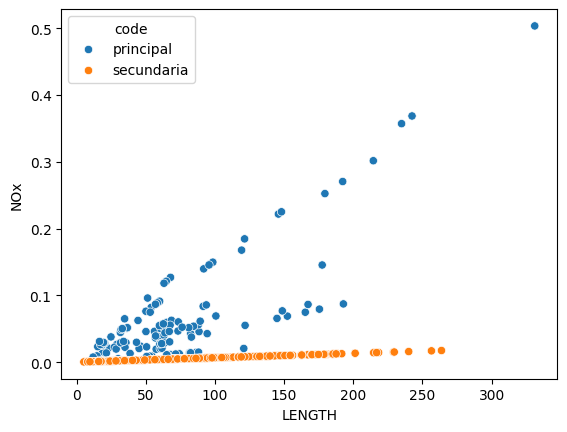

In [55]:
import seaborn as sns
sns.scatterplot(ruas_buildings, x='LENGTH', y ='NOx', hue='code')

<Axes: xlabel='LENGTH', ylabel='NOx'>

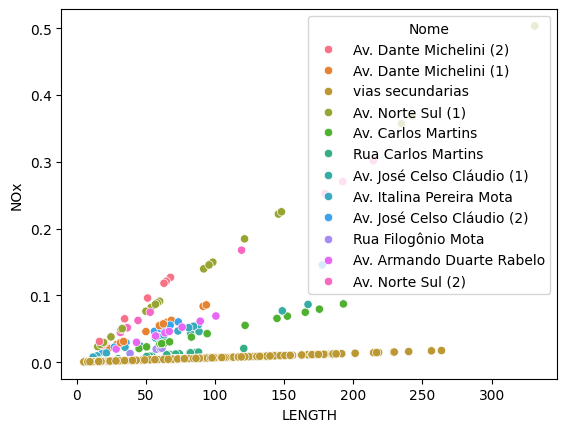

In [56]:
import seaborn as sns
sns.scatterplot(ruas_buildings, x='LENGTH', y ='NOx', hue='Nome')

In [57]:

cabeca3 = '#i idbrin typo xa ya xb yb  CH4       NMHC      CO        NOx       PA        FC         SO2       CO2       BE        EC         OM        NO2        TSP       PM10       PM25      PM1        IP        BkF          BbF          BghiP        Fl           BaP          Py           BjF          BaA          Chr          Phe          Ant          DahA         BeP          As           Cd           Cr           Cu           Hg           Ni           Pb           Se           Zn           Al           Ti           Fe           Ba           Si   '
cabeca3 = cabeca3.split()
df3 = gpd.GeoDataFrame({
    cabeca3[0]: map(int, ruas_buildings.ID),
    cabeca3[1]: map(int, ruas_buildings.ID),
    cabeca3[2]: map(int, ruas_buildings.TYPE),
    cabeca3[3]: jc_ruas.apply(lambda x: fromLine(x, 1), axis=1),
    cabeca3[4]: jc_ruas.apply(lambda x: fromLine(x, 2), axis=1),
    cabeca3[5]: jc_ruas.apply(lambda x: fromLine(x, 3), axis=1),
    cabeca3[6]: jc_ruas.apply(lambda x: fromLine(x, 4), axis=1),
    # {i: 0 for i in cabeca3[7:]}
})
poluentes = pd.DataFrame({i: np.zeros(len(jc_ruas)) for i in cabeca3[7:]})
# poluentes
df3 = df3.join(poluentes)
# fator de segunda a sexta
ft_sec = 1
# factor para convertir a ug/h
factor = 1e9


for i in range(24):
    brt_hour = (i + 3) % 24  # Ajuste de hora UTC para BRT
    for index, row in ruas_buildings.iterrows():
        # função de trafego para semana
        if row.Nome in vias_principais:
            ft = vias_principais[row.Nome]
            # encontrando a função de trafego, 0:hora(24) 1:dia(7) 2:mes(12)
            ft_prod = np.multiply(np.mean(ft[1][:-2])*ft[2][0],ft[0][brt_hour])
            df3.at[index,'PM10'] = row['PM10']*ft_prod*factor
            df3.at[index,'PM25'] = row['PM25']*ft_prod*factor
            df3.at[index,'SO2'] = row['SO2']*ft_prod*factor
            df3.at[index,'NOx'] = row['NOx']*ft_prod*factor
            df3.at[index,'CO'] = row['CO']*ft_prod*factor
        else:
            # df3.at[index,'PM10'] = 0 # 
            # df3.at[index,'PM25'] = 0 # 
            # df3.at[index,'SO2'] = 0 # 
            # df3.at[index,'NOx'] = 0 # 
            # df3.at[index,'CO'] = 0 #
            df3.at[index,'PM10'] = row['PM10']*ft_sec*factor
            df3.at[index,'PM25'] = row['PM25']*ft_sec*factor
            df3.at[index,'SO2'] = row['SO2']*ft_sec*factor
            df3.at[index,'NOx'] = row['NOx']*ft_sec*factor
            df3.at[index,'CO'] = row['CO']*ft_sec*factor
    df3.to_csv(f'../preprocessing/input/traffic/weekday/weekday{i:02d}', sep='\t', index=False)
df3

,#i,idbrin,typo,xa,ya,xb,yb,CH4,NMHC,CO,...,Hg,Ni,Pb,Se,Zn,Al,Ti,Fe,Ba,Si
0,1,1,1,-40.269249,-20.266658,-40.268650,-20.266422,0.0,0.0,1.693200e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2,1,-40.268650,-20.266422,-40.268081,-20.266189,0.0,0.0,1.614990e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,3,1,-40.268081,-20.266189,-40.267523,-20.265968,0.0,0.0,1.575621e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,4,1,-40.267523,-20.265968,-40.266955,-20.265790,0.0,0.0,7.614779e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,5,1,-40.266955,-20.265790,-40.266399,-20.265621,0.0,0.0,7.420928e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,663,663,1,-40.260917,-20.259036,-40.260630,-20.259388,0.0,0.0,5.884197e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
663,664,664,1,-40.260867,-20.260245,-40.260594,-20.260239,0.0,0.0,3.401441e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
664,665,665,0,-40.260867,-20.260245,-40.261199,-20.260253,0.0,0.0,4.143532e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
665,666,666,1,-40.266538,-20.255434,-40.265905,-20.255398,0.0,0.0,7.913209e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
for i in range(24):
    brt_hour = (i + 3) % 24  # Ajuste de hora UTC para BRT
    print(brt_hour)

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
0
1
2


In [59]:
cabeca4 = '#i idbrin typo xa ya xb yb  CH4       NMHC      CO        NOx       PA        FC         SO2       CO2       BE        EC         OM        NO2        TSP       PM10       PM25      PM1        IP        BkF          BbF          BghiP        Fl           BaP          Py           BjF          BaA          Chr          Phe          Ant          DahA         BeP          As           Cd           Cr           Cu           Hg           Ni           Pb           Se           Zn           Al           Ti           Fe           Ba           Si   '
cabeca4 = cabeca4.split()
df4 = gpd.GeoDataFrame({
    cabeca4[0]: map(int, ruas_buildings.ID),
    cabeca4[1]: map(int, ruas_buildings.ID),
    cabeca4[2]: map(int, ruas_buildings.TYPE),
    cabeca4[3]: jc_ruas.apply(lambda x: fromLine(x, 1), axis=1),
    cabeca4[4]: jc_ruas.apply(lambda x: fromLine(x, 2), axis=1),
    cabeca4[5]: jc_ruas.apply(lambda x: fromLine(x, 3), axis=1),
    cabeca4[6]: jc_ruas.apply(lambda x: fromLine(x, 4), axis=1),
    # {i: 0 for i in cabeca3[7:]}
})
poluentes = pd.DataFrame({i: np.zeros(len(jc_ruas)) for i in cabeca3[7:]})
# poluentes
df4 = df4.join(poluentes)
# fator sabado e domingo
ft_sec = 1
for i in range(24):
    brt_hour = (i + 3) % 24  # Ajuste de hora UTC para BRT
    for index, row in ruas_buildings.iterrows():
        if row.Nome in vias_principais:
            ft = vias_principais[row.Nome]
            ft_prod = np.multiply(np.mean(ft[1][-2:])*ft[2][0],ft[0][brt_hour])
            df4.at[index,'PM10'] = row['PM10']*ft_prod*factor
            df4.at[index,'PM25'] = row['PM25']*ft_prod*factor
            df4.at[index,'SO2'] = row['SO2']*ft_prod*factor
            df4.at[index,'NOx'] = row['NOx']*ft_prod*factor
            df4.at[index,'CO'] = row['CO']*ft_prod*factor
        else:
            # df4.at[index,'PM10'] = 0 #
            # df4.at[index,'PM25'] = 0 #
            # df4.at[index,'SO2'] = 0 #
            # df4.at[index,'NOx'] = 0 #
            # df4.at[index,'CO'] = 0 #
            df4.at[index,'PM10'] = row['PM10']*ft_sec*factor
            df4.at[index,'PM25'] = row['PM25']*ft_sec*factor
            df4.at[index,'SO2'] = row['SO2']*ft_sec*factor
            df4.at[index,'NOx'] = row['NOx']*ft_sec*factor
            df4.at[index,'CO'] = row['CO']*ft_sec*factor
    df4.to_csv(f'../preprocessing/input/traffic/weekend/weekend{i:02d}', sep='\t', index=False)
df4

,#i,idbrin,typo,xa,ya,xb,yb,CH4,NMHC,CO,...,Hg,Ni,Pb,Se,Zn,Al,Ti,Fe,Ba,Si
0,1,1,1,-40.269249,-20.266658,-40.268650,-20.266422,0.0,0.0,1.306296e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2,1,-40.268650,-20.266422,-40.268081,-20.266189,0.0,0.0,1.245957e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,3,1,-40.268081,-20.266189,-40.267523,-20.265968,0.0,0.0,1.215584e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,4,1,-40.267523,-20.265968,-40.266955,-20.265790,0.0,0.0,5.874766e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,5,1,-40.266955,-20.265790,-40.266399,-20.265621,0.0,0.0,5.725211e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,663,663,1,-40.260917,-20.259036,-40.260630,-20.259388,0.0,0.0,5.884197e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
663,664,664,1,-40.260867,-20.260245,-40.260594,-20.260239,0.0,0.0,3.401441e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
664,665,665,0,-40.260867,-20.260245,-40.261199,-20.260253,0.0,0.0,4.143532e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
665,666,666,1,-40.266538,-20.255434,-40.265905,-20.255398,0.0,0.0,7.913209e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

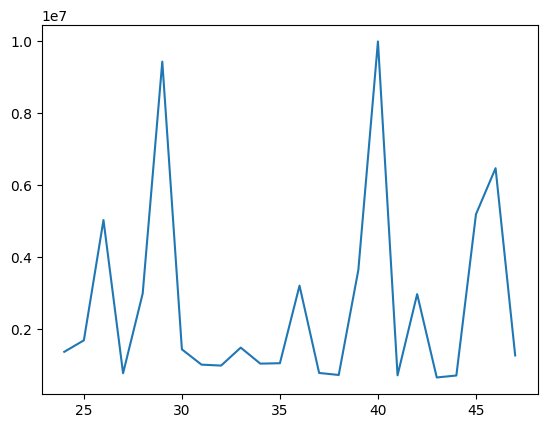

In [60]:
df4.NOx[24:48].plot()
#5.533882e+07	